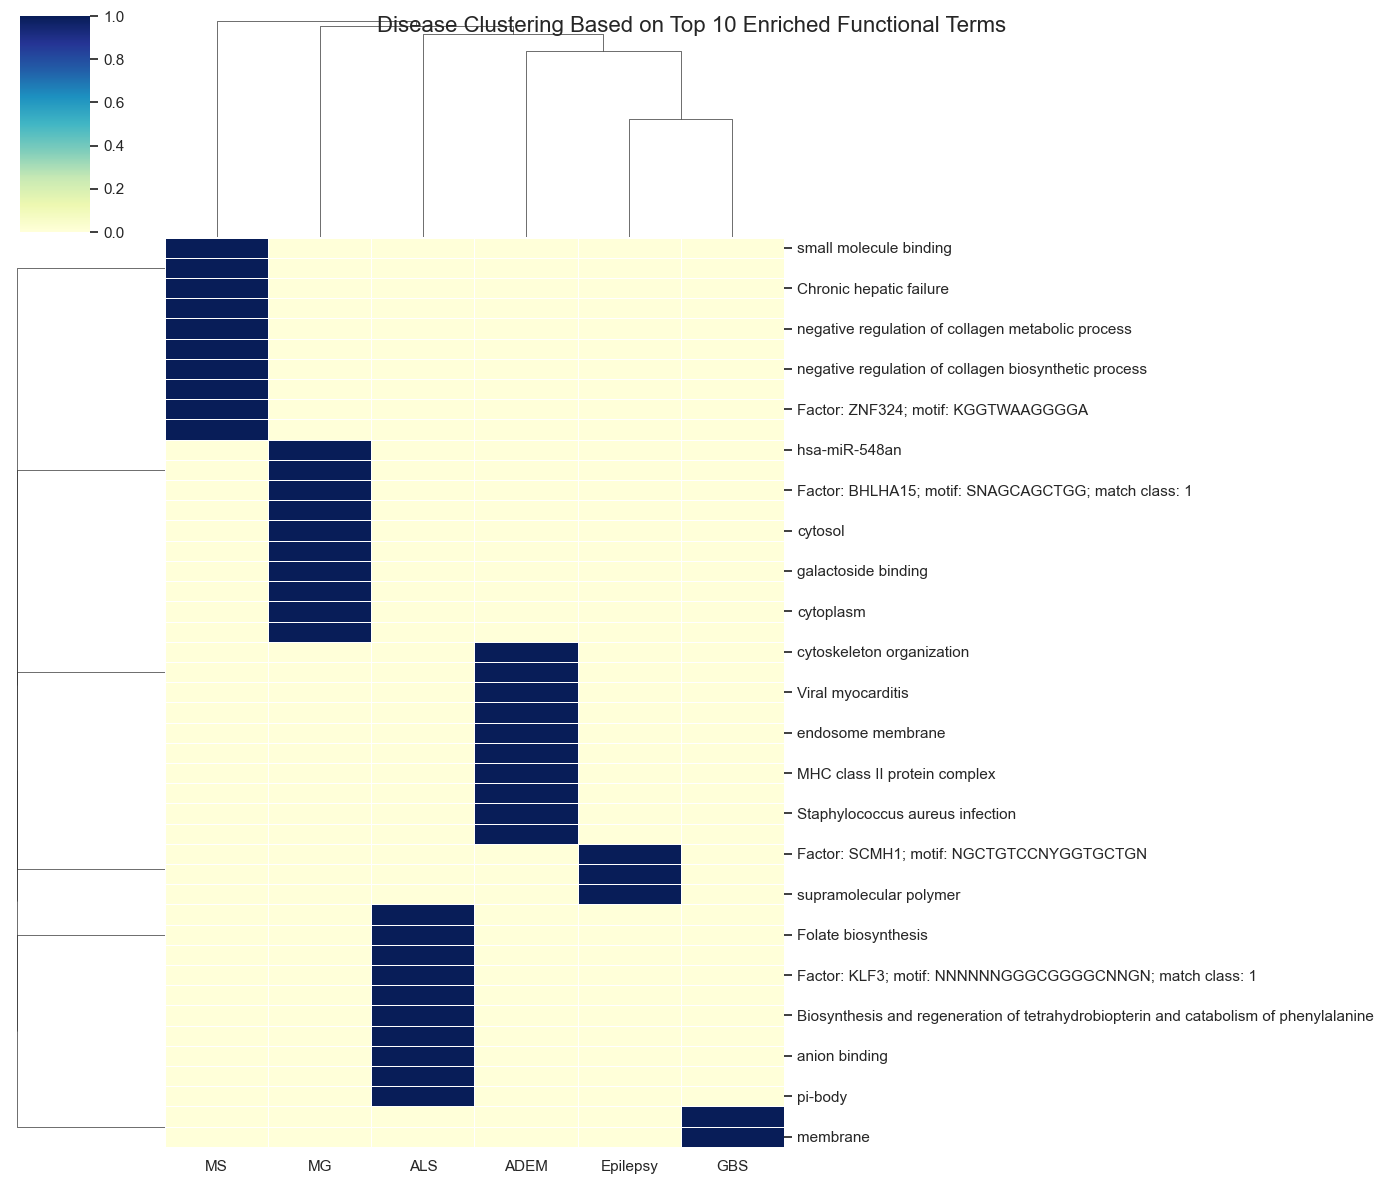

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Define file paths for each disease
file_paths = {
    "ADEM": "adem.csv",
    "ALS": "als.csv",
    "Epilepsy": "epilepsy.csv",
    "GBS": "gbs.csv",
    "MG": "mg.csv",
    "MS": "ms.csv"
}

# Dictionary to store top terms for each disease
top_terms_dict = {}

# Process each file
for disease, path in file_paths.items():
    df = pd.read_csv(path)
    df = df.dropna(subset=["term_name", "adjusted_p_value"])
    df["neglog10_p"] = -np.log10(df["adjusted_p_value"].replace(0, 1e-300))  # Replace 0s to avoid -inf
    top_df = df.sort_values("adjusted_p_value").head(10)  # Use top 10 terms
    top_terms_dict[disease] = top_df[["term_name", "neglog10_p"]]

# Create a pivot table of terms vs diseases
pivot_df = pd.DataFrame()

for disease, df in top_terms_dict.items():
    for _, row in df.iterrows():
        pivot_df.loc[row["term_name"], disease] = row["neglog10_p"]

# Fill NaNs with 0 (no enrichment)
pivot_df = pivot_df.fillna(0)

# Plot heatmap with clustering
sns.set(style="whitegrid")
g = sns.clustermap(
    pivot_df,
    cmap="YlGnBu",
    figsize=(14, 12),
    linewidths=0.5,
    standard_scale=0,
    method="average",
    metric="euclidean"
)

plt.suptitle("Disease Clustering Based on Top 10 Enriched Functional Terms", fontsize=16)
plt.savefig("disease_enrichment_clustering_top10.png", dpi=300, bbox_inches='tight')
plt.show()
